# Задание 1

### 1)

In [4]:
import numpy as np
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt


np.random.seed(42)  
n = 90
m0 = 7
sigma0 = 6
sample = np.random.normal(loc=m0,scale=sigma0,size=n)

sam_mean = np.mean(sample)
sam_var = np.sum((sample-sam_mean)**2)/(n-1) 

chi2_stat = (n-1)*sam_var/(sigma0**2) #статистика хи-квадрат

#определение односторонней альтернативы
if sam_var > sigma0**2:
    alt = '>' 
    p_value = 1 - chi2.cdf(chi2_stat,df=n-1)
else:
    alt = '<' 
    p_value = chi2.cdf(chi2_stat,df=n-1)

print(f'Выборочная дисперсия: {sam_var:.4f}')
print(f'Статистика хи-квадрат: {chi2_stat:.4f}')
print(f'Альтернатива: H1: σ {alt} σ0')
print(f'p-значение: {p_value:.4f}')
print(f'Гипотеза H0 принимается при α ∈ [0,{p_value:.4f})')

Выборочная дисперсия: 31.4687
Статистика хи-квадрат: 77.7975
Альтернатива: H1: σ < σ0
p-значение: 0.2041
Гипотеза H0 принимается при α ∈ [0,0.2041)


### 2)

In [5]:
alpha = 0.08

if alt == 'больше':
    crit_value = chi2.ppf(1-alpha,df=n-1)
else:
    crit_value = chi2.ppf(alpha,df=n-1)

sigma1 = 7 
if alt == 'больше':
    beta = chi2.cdf(crit_value*(sigma0**2 / sigma1**2),df=n-1)
else:
    beta = 1-chi2.cdf(crit_value*(sigma0**2 / sigma1**2),df=n-1)

print(f'Ошибка второго рода:')
print(f'β = {beta:.4f}')

Ошибка второго рода:
β = 0.9994


# Задание 2

### 1)

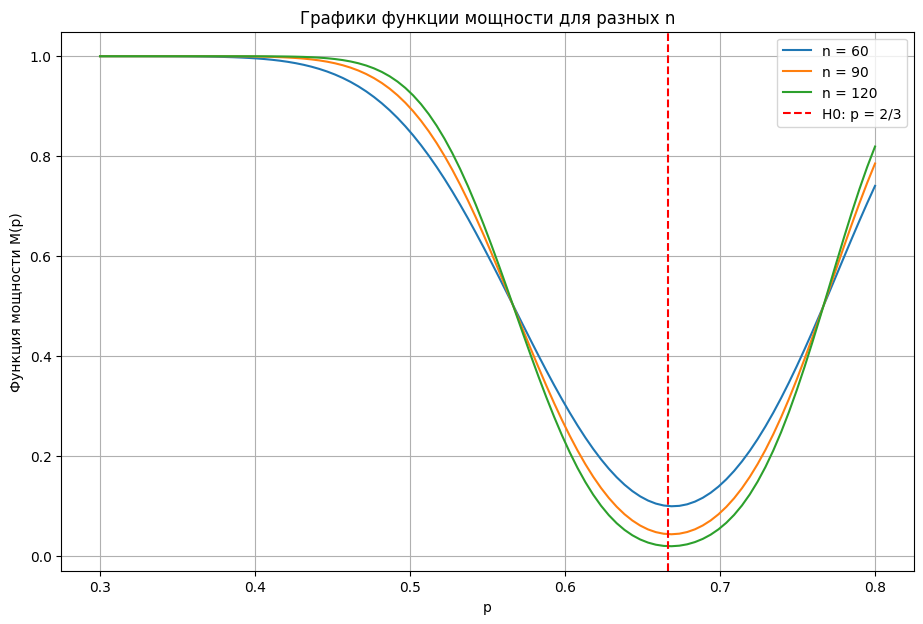

При n = 60:
   Ошибка первого рода (α): 0.1003
   Ошибка второго рода (β) при p=0.5: 0.1508
При n = 90:
   Ошибка первого рода (α): 0.0442
   Ошибка второго рода (β) при p=0.5: 0.1030
При n = 120:
   Ошибка первого рода (α): 0.0201
   Ошибка второго рода (β) при p=0.5: 0.0721


In [7]:
def power(p,n):
    sigma = np.sqrt(p*(1-p)/n)
    lower_b = 2/3 - 0.1
    upper_b = 2/3 + 0.1
    prob_lower = norm.cdf(lower_b,loc=p,scale=sigma)
    prob_upper = 1 - norm.cdf(upper_b,loc=p,scale=sigma)
    return prob_lower+prob_upper

sam_sizes = [60,90,120]
p_values = np.linspace(0.3,0.8,100)

plt.figure(figsize=(11,7))
for n in sam_sizes:
    M = [power(p,n) for p in p_values]
    plt.plot(p_values,M,label=f'n = {n}')

plt.axvline(x=2/3,color='red',linestyle='--',label='H0: p = 2/3')
plt.xlabel('p')
plt.ylabel('Функция мощности M(p)')
plt.title('Графики функции мощности для разных n')
plt.legend()
plt.grid()
plt.show()

alpha_values = []
beta_values = []

for n in sam_sizes:
    sigma_H0 = np.sqrt((2/3)*(1/3)/n)
    alpha = 2*(1 - norm.cdf(0.1/sigma_H0))
    alpha_values.append(alpha)
    M_p05 = power(0.5,n)
    beta = 1-M_p05
    beta_values.append(beta)
    print(f'При n = {n}:')
    print(f'   Ошибка первого рода (α): {alpha:.4f}')
    print(f'   Ошибка второго рода (β) при p=0.5: {beta:.4f}')

### 2)

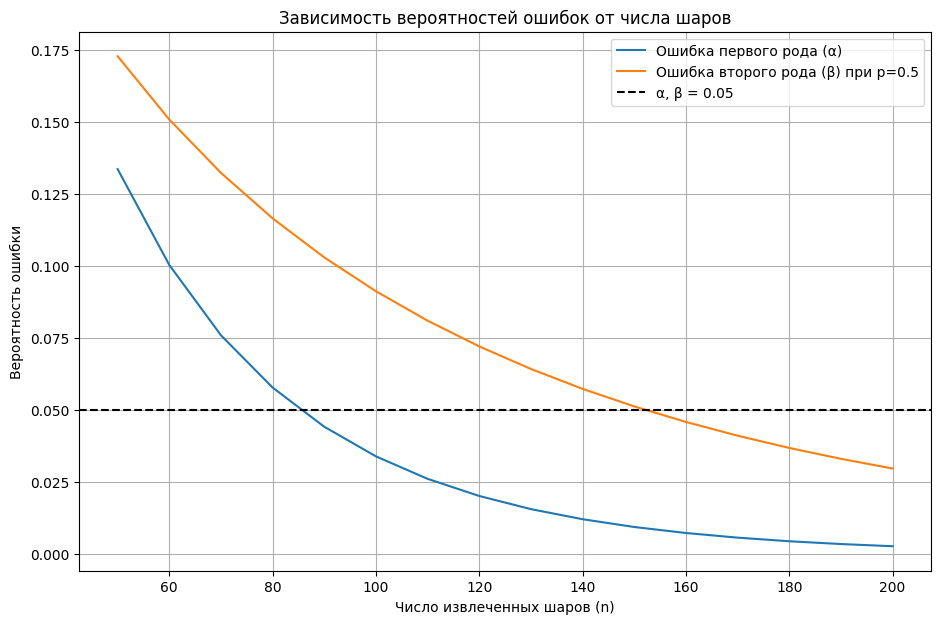

Минимальный объем выборки, где α и β ≤ 0.05: n = 160


In [9]:
n_values = np.arange(50,201,10)
alpha_val = []
beta_val = []

for n in n_values:
    sigma_H0 = np.sqrt((2/3)*(1/3)/n)
    alpha = 2*(1 - norm.cdf(0.1/sigma_H0))
    alpha_val.append(alpha)
    M_p05 = power(0.5, n)
    beta = 1-M_p05
    beta_val.append(beta)
    
plt.figure(figsize=(11,7))
plt.plot(n_values,alpha_val,label='Ошибка первого рода (α)')
plt.plot(n_values,beta_val,label='Ошибка второго рода (β) при p=0.5')
plt.axhline(y=0.05,color='black',linestyle='--',label='α, β = 0.05')
plt.xlabel('Число извлеченных шаров (n)')
plt.ylabel('Вероятность ошибки')
plt.title('Зависимость вероятностей ошибок от числа шаров')
plt.legend()
plt.grid()
plt.show()

#n, при котором α и β ≤ 0.05
for n, alpha, beta in zip(n_values,alpha_val,beta_val):
    if alpha <= 0.05 and beta <= 0.05:
        print(f'Минимальный объем выборки, где α и β ≤ 0.05: n = {n}')
        break